# Assignment 3

**Deadline**:  15/10/2024, 17:00

**Names and student numbers:**
1. name (student number)
2. ...
3. ...

**Declaration of Originality**

We whose names are given under 1., 2. and 3. above declare that:
1. These solutions are solely our own work.
2. We have not made (part of) these solutions available to any other student.

## Instructions for completing and submitting the assignment
Please pay attention to the following instructions:
1. Please follow carefully the steps outlined in the assignment. If you cannot solve an exercise and this hinders continuing with subsequent exercises, try to find a way to work around it and give a clear explanation for the solution you have chosen.
2. Submit your work in the form of a Jupyter notebook via Canvas, before the deadline. Your notebook should not give errors when executed with `Run All`.
4. You are allowed to work on the assignment in groups of 2 or 3 students and to submit together. Before you submit, you and your team members have to register as an **Assignment group** on Canvas. Only a single member of each group has to submit the notebook. Please do **NOT** submit the same notebook multiple times!
5. Please write your names also inside this markdown cell, under **Names and student numbers**.

**Exercise:** import the relevant libraries.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared
from sklearn.model_selection import GridSearchCV

# Instructions
In this assignment you have to develop a regression model. You will be given a training set of 800 datapoints. Using the techniques presented in this course, we ask you to come up with a model that has the best generalization performance. This performance will be assessed on a test dataset of 16,000 datapoints, which is not available to you. The assignment is also a competition: your mark depends (partly) on how well your model does compared to those of other groups and the three groups with the best performing model will be announced on Canvas.

### The data
The training data can be found in the file “training_data.csv” on Canvas. It consists of a two-dimensional comma-separated matrix of 800 rows and 27 columns. Each row is a datapoint, consisting of 26 input variables and 1 target variable. The target variable is the last column of the matrix.

### Submitting your work
Your work in this Jupyter notebook consists of two parts. **Part 1** is used to train, create and evaluate your best performing model. In the first cell, you have to train your best performing model on the training data. The code to load the training data is already given. Furthermore, in that same cell you have to create a function called `best_model`. This function has a single input argument, which is a 2-dimensional NumPy array with an arbitrary number of rows and 26 columns (e.g. the input features `X` of the training data). The function should return a 1-dimensional array with the predictions of your best model for the datapoints in the input argument. Hence, the number of elements in this 1-dimensional array should be equal to the number of rows of the 2-dimensional array used as input argument.

In the second cell, we are using a testset called `test_data.csv` of 16,000 datapoints to assess the generalization performance of your function `best_model`. Of course, the testset is only available to the teachers. The code in the second cell may not be changed!!! It will be used by the teachers to compute the generalization performance of your best model. On Canvas, you can find a file called `FAKE_test_data.csv`. This is a 2-dimensional array of completely random numbers (fake data), having the same dimensions as the dataset in `test_data.csv`. If you put this file in the same folder as this Jupyter notebook, you can test whether your function `best_model` is defined correctly by checking if the second cell runs without errors. Since the numbers in `FAKE_test_data.csv` are fake data, they **cannot** be used to estimate the performance of your `best_model`. **AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE FIRST CELL, THE SECOND CELL SHOULD RUN WITHOUT ERRORS!!!** If this is not the case, your work will **not** be marked. 

In **Part 2** of the notebook, you will present your analysis of the regression problem and the steps you have taken to arrive at your best model. Here, you have to explain and perform all the methods that you have used to identify your best model. As in all exercises, please make sure all steps are well motivated and presented in a clear and structured manner. We recommend using visualization methods (e.g., plots with matplotlib), if applicable, to clarify your work.

### Examples
On Canvas, you can find two example notebooks (“DSM_assignment3_example_with_sklearn.ipynb”, “DSM_assignment3_example_without_sklearn.ipynb”). These notebooks contain examples of how you can submit **Part 1** of the assignment. As "best model" in the examples, we have **arbitrarily** chosen for a regression model using the third power of the 7-th principal component. In one of the files we use scikit-learn, whereas in the other one we train the same model without using scikit-learn. Please look carefully at how the function `best_model` is created and make sure you understand all steps.

### Allowed methods
Any of the methods discussed in the course may be used. You are also allowed to combine different models and techniques. If you doubt whether your method is allowed, please consult with the teachers. 

Furthermore, you are allowed to use libraries like scikit-learn, but you are not required to use them.

### The competition
The generalization performance of your best model is assessed by the **root mean squared error (RMSE)** on a secret test dataset consisting of 16,000 independent and identically distributed datapoints. They were created with the same data-generating process as the data of the training set of 800 datapoints. The scores will be ranked and the top-three groups and their scores will be announced in class.

### The marking
As can be seen in the rubric on Canvas, 20% of your mark will depend on the generalization performance of your best model, compared to the best models of your peers. The other 80% is for the quality of your analysis and your code.

# Part 1: training, creating and evaluating your best model

In [2]:
#####################################################
# USE THIS CELL TO TRAIN AND CREATE YOUR BEST MODEL # 
#####################################################

# loading the training data
training_data = np.genfromtxt("training_data.csv", delimiter=',')
X = training_data[:,:-1]
y = training_data[:,-1]



In [3]:
######################################################
#    !!!DO NOT CHANGE THE CODE IN THIS CELL!!!       #
# THIS CELL IS USED FOR EVALUATING YOUR BEST MODEL.  #  
# AFTER TRAINING AND CREATING YOUR BEST MODEL IN THE #
# PREVIOUS CELL, THIS CELL SHOULD RUN WITHOUT ERRORS # 
######################################################

# Determining which test data will be used. If real test 
# data is available, it will be used. Otherwise, the 
# fake test data will be used.
if os.path.exists("test_data.csv"):
    test_data_filename = "test_data.csv"
elif os.path.exists("FAKE_test_data.csv"):
    test_data_filename = "FAKE_test_data.csv"
else:
    test_data_filename = None
    print("ERROR: Test data is missing!")
    
if test_data_filename:

    # loading the test data    
    test_data = np.genfromtxt(test_data_filename, delimiter=',')
    X_test = test_data[:,:-1]
    y_test = test_data[:,-1]

    # making predictions and computing the root mean squared error (RMSE)
    predictions = best_model(X_test)
    RMSE = np.sqrt(np.mean((predictions - y_test)**2))

    print("The RMSE is: ", RMSE)

NameError: name 'best_model' is not defined

# Part 2: analysis 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings

## Splitting the data into train, test split

In [4]:
X_with_constant = np.hstack([np.ones((X.shape[0], 1)), X])

# Split the modified data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_with_constant, y)

## Function to remove outliers

In [15]:
def remove_outliers(X, y, threshold=1.5):
    # Combine X and y into a single DataFrame for easier processing
    data = pd.DataFrame(X)
    data['target'] = y

    # Calculate Q1 and Q3 for each feature
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Filter data within the acceptable range
    data_filtered = data[~((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))).any(axis=1)]

    # Separate the filtered data back into features and target
    X_filtered = data_filtered.drop(columns=['target']).values
    y_filtered = data_filtered['target'].values
    return X_filtered, y_filtered

## Creating Scaled Data

In [16]:
def standardize_data(X_train, X_test):
    """
    Standardizes the training and testing data using StandardScaler.

    Parameters:
    X_train (array-like): The training data features.
    X_test (array-like): The testing data features.

    Returns:
    X_train_scaled (array-like): Standardized training data.
    X_test_scaled (array-like): Standardized testing data.
    scaler (StandardScaler object): The fitted scaler used for standardization.
    """
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both the training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

## Creating polynomial features

In [17]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_features(X_train, X_test, degree=2, include_bias=False):
    """
    Creates polynomial features for the training and testing data.

    Parameters:
    X_train (array-like): The training data features.
    X_test (array-like): The testing data features.
    degree (int): The degree of the polynomial features to be generated.
    include_bias (bool): Whether to include a bias (intercept) column in the output.

    Returns:
    X_train_poly (array-like): Training data with polynomial features.
    X_test_poly (array-like): Testing data with polynomial features.
    poly_transformer (PolynomialFeatures object): The fitted transformer used for polynomial feature generation.
    """
    # Create a PolynomialFeatures object
    poly_transformer = PolynomialFeatures(degree=degree, include_bias=include_bias)

    # Fit the transformer on the training data and transform both the training and testing data
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)

    return X_train_poly, X_test_poly, poly_transformer

## Creating PCA transfomation

In [18]:
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test, n_components=None):
    """
    Applies PCA (Principal Component Analysis) to the training and testing data.

    Parameters:
    X_train (array-like): The training data features.
    X_test (array-like): The testing data features.
    n_components (int, float, None): The number of components to keep. If None, all components are kept.
                                     If 0 < n_components < 1, it indicates the percentage of variance explained.

    Returns:
    X_train_pca (array-like): Transformed training data with PCA applied.
    X_test_pca (array-like): Transformed testing data with PCA applied.
    pca_transformer (PCA object): The fitted PCA transformer used for dimensionality reduction.
    """
    # Create a PCA object
    pca_transformer = PCA(n_components=n_components)

    # Fit the PCA transformer on the training data and transform both the training and testing data
    X_train_pca = pca_transformer.fit_transform(X_train)
    X_test_pca = pca_transformer.transform(X_test)

    return X_train_pca, X_test_pca, pca_transformer


## Creating all the different X and y values

In [20]:
# no outliers
x_train_clean, y_train_clean = remove_outliers(x_train, y_train)

# scaled
x_train_scaled, x_test_scaled = standardize_data(x_train_clean, x_test)

# scaled and no outliers
x_train_scaled_clean, x_test_scaled_clean = standardize_data(x_train_clean, x_test)# Apply the function to training and testing sets

# polynomial features
x_train_poly, x_test_poly, poly_transformer = create_polynomial_features(x_train_clean, x_test, degree=3)

# polynomial features of scaled clean
x_train_scaled_poly, x_test_scaled_poly, poly_transformer = create_polynomial_features(x_train_scaled_clean, x_test_scaled_clean, degree=3)

# polynomial features of clean
x_train_clean_poly, x_test_clean_poly, poly_transformer = create_polynomial_features(x_train_clean, x_test, degree=3)

# PCA and polynomial clean
x_train_pca, X_test_pca, pca_transformer = apply_pca(x_train_clean_poly, x_test_clean_poly, n_components=0.98)

# PCA and scaled clean
x_train_scaled_pca, X_test_scaled_pca, pca_transformer = apply_pca(x_train_scaled_poly, x_test_scaled_poly, n_components=0.98)


data_variants = {
    "no_outliers": (x_train_clean, y_train_clean, x_test, y_test),
    "scaled": (x_train_scaled, y_train_clean, x_test_scaled, y_test),
    "scaled_no_outliers": (x_train_scaled_clean, y_train_clean, x_test_scaled_clean, y_test),
    "polynomial": (x_train_poly, y_train_clean, x_test_poly, y_test),
    "polynomial_scaled_no_outliers": (x_train_scaled_poly, y_train_clean, x_test_scaled_poly, y_test),
    "polynomial_no_outliers": (x_train_clean_poly, y_train_clean, x_test_clean_poly, y_test),
    "PCA polynomial clean": (x_train_pca, y_train_clean, X_test_pca, y_test),
    "PCA polynomial scaled clean": (x_train_scaled_pca, y_train_clean, X_test_scaled_pca, y_test)
}


## Model to test Ridge Regression model

In [21]:
def tune_ridge_regression(X_train, y_train, X_test, param_grid=None, cv=5):
    """
    Tunes the Ridge regression model using GridSearchCV with a given parameter grid.
    Uses negative mean squared error as the scoring metric.

    Parameters:
    X_train (array-like): The training data features.
    y_train (array-like): The training target values.
    X_test (array-like): The testing data features.
    param_grid (dict): The parameter grid to search over. If None, a default grid will be used.
    cv (int): Number of cross-validation folds.

    Returns:
    best_model (Ridge): The best Ridge regression model found by GridSearchCV.
    best_params (dict): The best hyperparameters found by GridSearchCV.
    grid_search (GridSearchCV): The fitted GridSearchCV object.
    y_pred (array-like): Predictions made by the best model on the test set.
    """
    warnings.filterwarnings("ignore")
    # Define a default parameter grid if none is provided
    if param_grid is None:
        param_grid = {
            'alpha': [0, 0.1, 10.0, 100.0, 1000.0],
        }

    # Create a Ridge regression model
    ridge = Ridge()

    # Set up GridSearchCV with the Ridge model and parameter grid
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    return best_model, best_params, grid_search, y_pred

## Model to tune Lasso

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings

def tune_lasso_regression(X_train, y_train, X_test, param_grid=None, cv=5):
    """
    Tunes the Lasso regression model using GridSearchCV with a given parameter grid.
    Uses negative mean squared error as the scoring metric.

    Parameters:
    X_train (array-like): The training data features.
    y_train (array-like): The training target values.
    X_test (array-like): The testing data features.
    param_grid (dict): The parameter grid to search over. If None, a default grid will be used.
    cv (int): Number of cross-validation folds.

    Returns:
    best_model (Lasso): The best Lasso regression model found by GridSearchCV.
    best_params (dict): The best hyperparameters found by GridSearchCV.
    grid_search (GridSearchCV): The fitted GridSearchCV object.
    y_pred (array-like): Predictions made by the best model on the test set.
    """
    warnings.filterwarnings("ignore")
    # Define a default parameter grid if none is provided
    if param_grid is None:
        param_grid = {
            'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        }

    # Create a Lasso regression model
    lasso = Lasso()

    # Set up GridSearchCV with the Lasso model and parameter grid
    grid_search = GridSearchCV(
        estimator=lasso,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    return best_model, best_params, grid_search, y_pred


## Model to tune Kernel Ridge

In [23]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import warnings

def tune_kernel_ridge_regression(X_train, y_train, X_test, param_grid=None, cv=5):
    """
    Tunes the Kernel Ridge regression model using GridSearchCV with a given parameter grid.
    Uses negative mean squared error as the scoring metric.

    Parameters:
    X_train (array-like): The training data features.
    y_train (array-like): The training target values.
    X_test (array-like): The testing data features.
    param_grid (dict): The parameter grid to search over. If None, a default grid will be used.
    cv (int): Number of cross-validation folds.

    Returns:
    best_model (KernelRidge): The best Kernel Ridge regression model found by GridSearchCV.
    best_params (dict): The best hyperparameters found by GridSearchCV.
    grid_search (GridSearchCV): The fitted GridSearchCV object.
    y_pred (array-like): Predictions made by the best model on the test set.
    """
    warnings.filterwarnings("ignore")
    # Define a default parameter grid if none is provided
    if param_grid is None:
        param_grid = {
            'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
            'kernel': ['linear','rbf', 'poly', 'sigmoid'],
            'degree': [2, 3, 4]
        }

    # Create a Kernel Ridge regression model
    kernel_ridge = KernelRidge()

    # Set up GridSearchCV with the Kernel Ridge model and parameter grid
    grid_search = GridSearchCV(
        estimator=kernel_ridge,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    return best_model, best_params, grid_search, y_pred


## Code to Check all Models on all datasets

In [24]:
from sklearn.metrics import mean_squared_error

# Extended version to include Lasso, Ridge, and Kernel Ridge regression tuning with refitting and retraining
results_extended = {
    "Model": [],
    "Variant": [],
    "Best Params": [],
    "Train RMSE": [],
    "Test RMSE": []
}

# Loop through each data variant and perform Lasso, Ridge, and Kernel Ridge regression tuning
for model_name, tune_function in [#("Ridge", tune_ridge_regression), 
                                  #("Lasso", tune_lasso_regression), 
                                  ("Kernel Ridge", tune_kernel_ridge_regression)]:
    for variant_name, (X_train_var, y_train_var, X_test_var, y_test_var) in data_variants.items():
        # Tune the regression model (Ridge, Lasso, or Kernel Ridge)
        best_model, best_params, grid_search, _ = tune_function(X_train_var, y_train_var, X_test_var)

        # Refit the model using the best parameters on the entire training set
        best_model.fit(X_train_var, y_train_var)

        # Calculate the mean squared error on the training set
        y_train_pred = best_model.predict(X_train_var)
        train_mse = mean_squared_error(y_train_var, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        # Predict the target values on the test set
        y_test_pred = best_model.predict(X_test_var)
        test_mse = mean_squared_error(y_test_var, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        # Save the results
        results_extended["Model"].append(model_name)
        results_extended["Variant"].append(variant_name)
        results_extended["Best Params"].append(best_params)
        results_extended["Train RMSE"].append(train_rmse)
        results_extended["Test RMSE"].append(test_rmse)

        # Print the results for each model and variant
        print(f"Model: {model_name}, Variant: {variant_name}")
        print(f"Best {model_name} model parameters: {best_params}")
        print(f"Train RMSE: {train_rmse:.4f}")
        print(f"Test RMSE: {test_rmse:.4f}\n")

# Convert the extended results to a DataFrame for better display
results_extended_df = pd.DataFrame(results_extended)
results_extended_df


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: no_outliers
Best Kernel Ridge model parameters: {'alpha': 1.0, 'degree': 2, 'kernel': 'rbf'}
Train RMSE: 1.2266
Test RMSE: 6.8602

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: scaled
Best Kernel Ridge model parameters: {'alpha': 0.01, 'degree': 4, 'kernel': 'poly'}
Train RMSE: 1.2302
Test RMSE: 6.8412

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: scaled_no_outliers
Best Kernel Ridge model parameters: {'alpha': 0.01, 'degree': 4, 'kernel': 'poly'}
Train RMSE: 1.2302
Test RMSE: 6.8412

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: polynomial
Best Kernel Ridge model parameters: {'alpha': 100.0, 'degree': 2, 'kernel': 'linear'}
Train RMSE: 1.2583
Test RMSE: 6.8571

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: polynomial_scaled_no_outliers
Best Kernel Ridge model parameters: {'alpha': 10.0, 'degree': 2, 'kernel': 'linear'}
Train RMSE: 1.2490
Test RMSE: 6.8058

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: polynomial_no_outliers
Best Kernel Ridge model parameters: {'alpha': 100.0, 'degree': 2, 'kernel': 'linear'}
Train RMSE: 1.2583
Test RMSE: 6.8571

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: PCA polynomial clean
Best Kernel Ridge model parameters: {'alpha': 0.01, 'degree': 3, 'kernel': 'poly'}
Train RMSE: 1.3132
Test RMSE: 6.9973

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/paolocadei/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution i

Model: Kernel Ridge, Variant: PCA polynomial scaled clean
Best Kernel Ridge model parameters: {'alpha': 1.0, 'degree': 2, 'kernel': 'poly'}
Train RMSE: 1.2527
Test RMSE: 6.8156



,Model,Variant,Best Params,Train RMSE,Test RMSE
0,Kernel Ridge,no_outliers,"{'alpha': 1.0, 'degree': 2, 'kernel': 'rbf'}",1.226612,6.860188
1,Kernel Ridge,scaled,"{'alpha': 0.01, 'degree': 4, 'kernel': 'poly'}",1.230238,6.841178
2,Kernel Ridge,scaled_no_outliers,"{'alpha': 0.01, 'degree': 4, 'kernel': 'poly'}",1.230238,6.841178
3,Kernel Ridge,polynomial,"{'alpha': 100.0, 'degree': 2, 'kernel': 'linear'}",1.258345,6.857076
4,Kernel Ridge,polynomial_scaled_no_outliers,"{'alpha': 10.0, 'degree': 2, 'kernel': 'linear'}",1.248984,6.805775
5,Kernel Ridge,polynomial_no_outliers,"{'alpha': 100.0, 'degree': 2, 'kernel': 'linear'}",1.258345,6.857076
6,Kernel Ridge,PCA polynomial clean,"{'alpha': 0.01, 'degree': 3, 'kernel': 'poly'}",1.313154,6.997328
7,Kernel Ridge,PCA polynomial scaled clean,"{'alpha': 1.0, 'degree': 2, 'kernel': 'poly'}",1.252687,6.815603


## Visualising the results

In [23]:
results_extended_df

,Model,Variant,Best Params,Train RMSE,Test RMSE
0,Ridge,no_outliers,{'alpha': 10.0},0.986234,13.565836
1,Ridge,scaled,{'alpha': 0},0.985567,13.565612
2,Ridge,scaled_no_outliers,{'alpha': 0},0.985567,13.565612
3,Ridge,polynomial,{'alpha': 0},0.472662,12.561850
4,Ridge,polynomial_scaled_no_outliers,{'alpha': 0.1},0.656532,12.794331
5,Ridge,polynomial_no_outliers,{'alpha': 0},0.472662,12.561850
6,Ridge,PCA polynomial clean,{'alpha': 0},1.312859,13.625143
7,Ridge,PCA polynomial scaled clean,{'alpha': 0},1.305956,13.619213
8,Lasso,no_outliers,{'alpha': 0.01},1.232494,13.589902
9,Lasso,scaled,{'alpha': 0.01},1.302061,13.615521


## Fitting the best model and visualising the y_pred

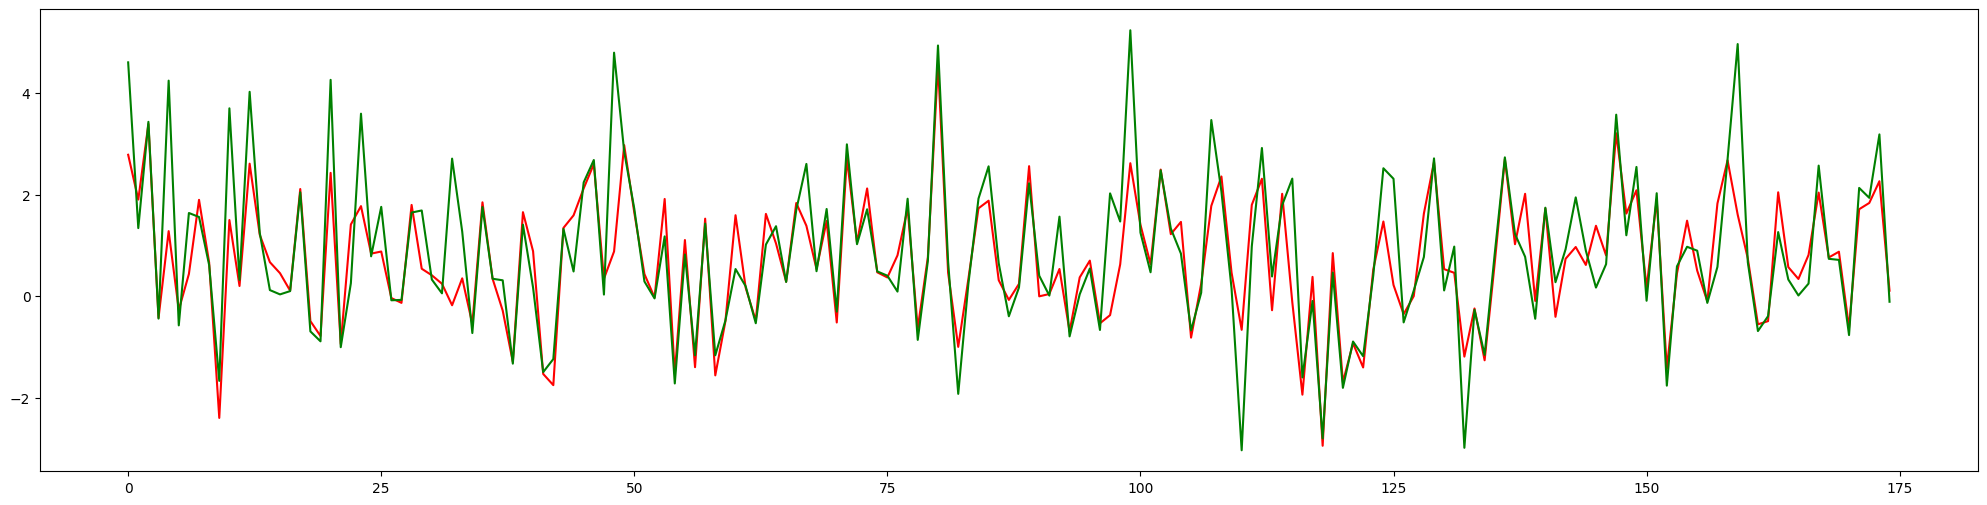

In [ ]:
r = Ridge(alpha = 0.1)

r.fit(x_train_scaled_poly, y_train_clean)

y_pred = r.predict(x_test_scaled_poly)

plt.figure(figsize=(25, 6))
plt.plot(range(0, len(y_pred)), y_pred, color = 'red')
plt.plot(range(0, len(y_pred)), y_test_clean, color = 'green')
plt.show()